/tmp/ipykernel_73056/217008835.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


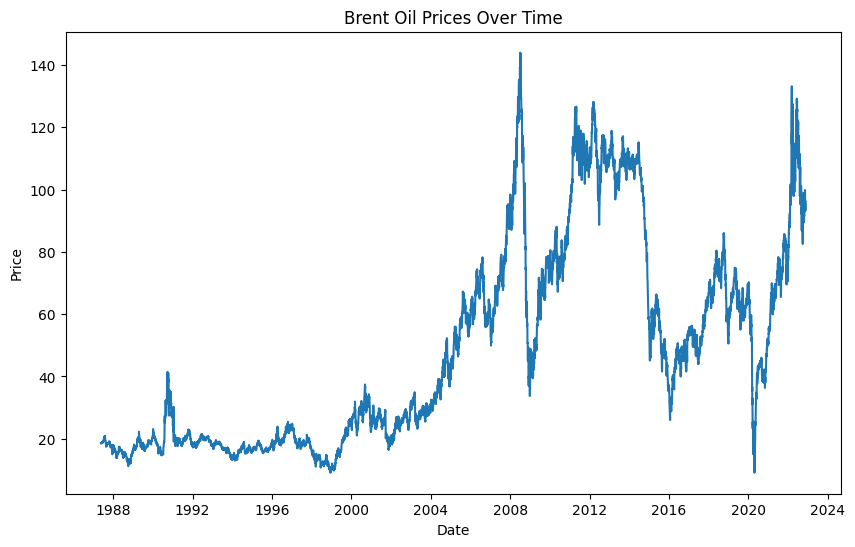

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed data
data = pd.read_csv('../Inputs/data/processed_data/brent_oil_prices.csv')

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set Date column as index
data.set_index('Date', inplace=True)

# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


/tmp/ipykernel_73056/2944563280.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


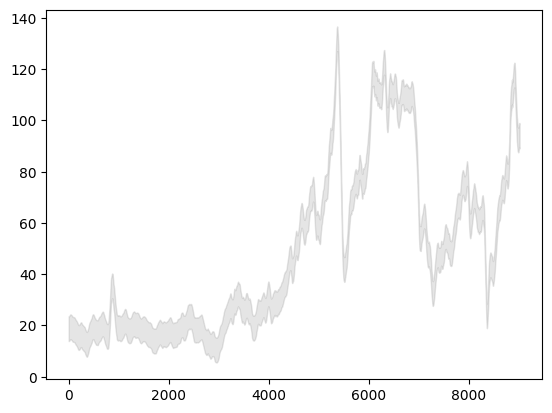

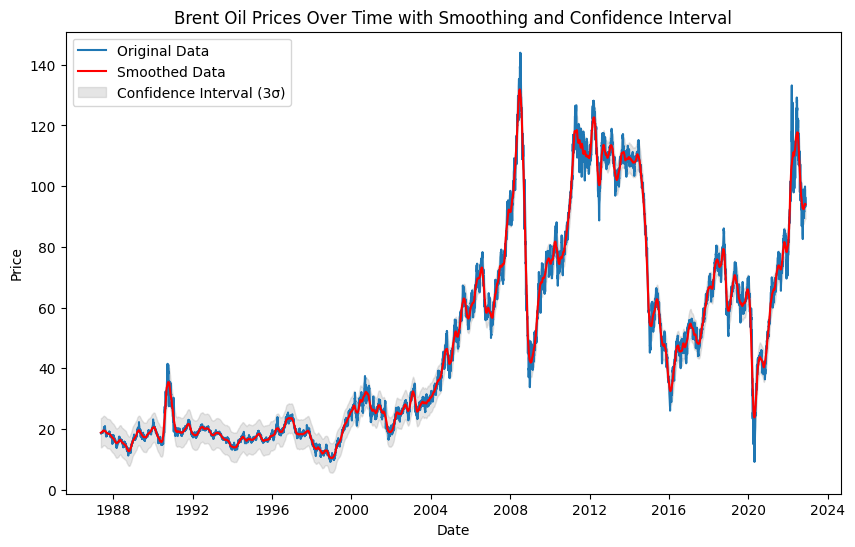

In [20]:
from tsmoothie.smoother import ConvolutionSmoother
import pandas as pd
import matplotlib.pyplot as plt

# Load processed data
data = pd.read_csv('../Inputs/data/processed_data/brent_oil_prices.csv')

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract Price column
Price = data['Price'].values

# Perform smoothing
smoother = ConvolutionSmoother(window_len=50, window_type='ones')
smoother.smooth(Price)

# Generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=2)
low = low.flatten()
up = up.flatten()

plt.fill_between(data.index, low, up, color='gray', alpha=0.2, label='Confidence Interval (3σ)')

# Set Date column as index
data.set_index('Date', inplace=True)

# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'], label='Original Data')
plt.plot(data.index, smoother.smooth_data[0], label='Smoothed Data', color='red')
plt.fill_between(data.index, low, up, color='gray', alpha=0.2, label='Confidence Interval (3σ)')
plt.title('Brent Oil Prices Over Time with Smoothing and Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [1]:
import pandas as pd
df=pd.read_csv("../Inputs/data/processed_data/cleaned_gdp_data.csv")

In [6]:
df.head()

,date,GDP,Country Name
0,2022,3.544708e+09,Aruba
1,2021,3.103184e+09,Aruba
2,2020,2.558906e+09,Aruba
3,2019,3.395799e+09,Aruba
4,2018,3.276184e+09,Aruba


In [2]:
import pandas as pd

# Read preprocessed data
oil_data = pd.read_csv("../Inputs/data/processed_data/preprocessed_oil_data.csv")
gdp_data = pd.read_csv("../Inputs/data/processed_data/preprocessed_gdp_data.csv")
inflation_data = pd.read_csv("../Inputs/data/processed_data/preprocessed_inflation_data.csv")

# Check column names and data
print("Column names in oil_data:", oil_data.columns)
print("Column names in gdp_data:", gdp_data.columns)
print("Column names in inflation_data:", inflation_data.columns)

# Merge datasets on 'date'
merged_data = pd.merge(oil_data, gdp_data[['date', 'GDP']], on='date', how='inner')
merged_data = pd.merge(merged_data, inflation_data[['DATE', 'CPIAUCSL']], on='date', how='inner')

# Calculate correlations
correlations = merged_data[['Price', 'GDP', 'CPIAUCSL']].corr()

print("Correlation Matrix:")
print(correlations)
print("Merged Data Sample:")
print(merged_data.head(10))


Column names in oil_data: Index(['Price', 'date'], dtype='object')
Column names in gdp_data: Index(['date', 'GDP', 'Country Name'], dtype='object')
Column names in inflation_data: Index(['CPIAUCSL', 'date'], dtype='object')


KeyError: "['DATE'] not in index"

In [14]:
inflation_data.head()

,DATE,CPIAUCSL,date,CPIAUCSL_scaled
0,1988-01-01,116.0,1988,-1.703776
1,1988-02-01,116.2,1988,-1.699749
2,1988-03-01,116.5,1988,-1.693708
3,1988-04-01,117.2,1988,-1.679612
4,1988-05-01,117.5,1988,-1.673572


In [15]:
oil_data.head()


,Date,Price,date
0,20-May-87,18.63,1987
1,21-May-87,18.45,1987
2,22-May-87,18.55,1987
3,25-May-87,18.60,1987
4,26-May-87,18.63,1987


In [16]:
gdp_data.head()

,date,GDP,Country Name,GDP_scaled
0,1970,3.544708e+09,Aruba,-0.229079
1,1970,3.103184e+09,Aruba,-0.229176
2,1970,2.558906e+09,Aruba,-0.229296
3,1970,3.395799e+09,Aruba,-0.229112
4,1970,3.276184e+09,Aruba,-0.229138


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import wbdata
from datetime import datetime
import pandas_datareader.data as web

def scrape_world_bank_data():
    def get_gdp_data(country_code):
        indicators = {'NY.GDP.MKTP.CD': 'GDP'}
        gdp_data = wbdata.get_dataframe(indicators, country=country_code, date=(datetime(1970, 1, 1), datetime.now()))
        gdp_data.reset_index(inplace=True)
        return gdp_data

    countries = wbdata.get_countries()
    all_gdp_data = pd.DataFrame()

    for country in countries:
        country_code = country['id']
        country_name = country['name']

        try:
            gdp_data_country = get_gdp_data(country_code)
            gdp_data_country['Country Name'] = country_name
            all_gdp_data = pd.concat([all_gdp_data, gdp_data_country], ignore_index=True)
            print(f"Collected GDP data for {country_name} ({country_code})")
        except Exception as e:
            print(f"Failed to collect GDP data for {country_name} ({country_code}): {str(e)}")

    all_gdp_data.to_csv('../Inputs/data_raw/all_countries_gdp.csv', index=False)

def scrape_imf_data():
    url = 'https://www.imf.org/en/Data'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    # Implement scraping logic to extract relevant data
    data = []
    table = soup.find('table', {'class': 'economic-outlook'})
    for row in table.find_all('tr')[1:]:
        columns = row.find_all('td')
        data.append([col.text.strip() for col in columns])
    df = pd.DataFrame(data, columns=['Country', 'Year', 'Economic Outlook'])
    df.to_csv('../Inputs/data_raw/imf_data.csv', index=False)

def scrape_opec_policies():
    url = 'https://www.opec.org/opec_web/en/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    # Implement scraping logic to extract relevant data
    data = []
    articles = soup.find_all('article')
    for article in articles:
        title = article.find('h2').text.strip()
        date = article.find('time').text.strip()
        content = article.find('p').text.strip()
        data.append([date, title, content])
    df = pd.DataFrame(data, columns=['Date', 'Title', 'Content'])
    df.to_csv('../Inputs/data_raw/opec_policies.csv', index=False)

def scrape_inflation_data():
    inflation_data = web.DataReader('CPIAUCSL', 'fred', start='1970-01-01', end=datetime.now())
    inflation_data.to_csv('../Inputs/data_raw/inflation_data.csv')

if __name__ == '__main__':
    scrape_world_bank_data()
    scrape_imf_data()
    scrape_opec_policies()
    scrape_inflation_data()


Failed to collect GDP data for Aruba (ABW): 'NoneType' object does not support item deletion
Collected GDP data for Africa Eastern and Southern (AFE)
Failed to collect GDP data for Afghanistan (AFG): 'NoneType' object does not support item deletion
Failed to collect GDP data for Africa (AFR): 'NoneType' object is not iterable
Failed to collect GDP data for Africa Western and Central (AFW): 'NoneType' object does not support item deletion
Collected GDP data for Angola (AGO)
Failed to collect GDP data for Albania (ALB): 'NoneType' object does not support item deletion
Collected GDP data for Andorra (AND)
Failed to collect GDP data for Arab World (ARB): 'NoneType' object does not support item deletion
Collected GDP data for United Arab Emirates (ARE)
Failed to collect GDP data for Argentina (ARG): 'NoneType' object does not support item deletion
Collected GDP data for Armenia (ARM)
Failed to collect GDP data for American Samoa (ASM): 'NoneType' object does not support item deletion
Collec

/tmp/ipykernel_312176/1424363765.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_gdp_data = pd.concat([all_gdp_data, gdp_data_country], ignore_index=True)


Collected GDP data for Not classified (INX)
Failed to collect GDP data for Ireland (IRL): 'NoneType' object does not support item deletion
Collected GDP data for Iran, Islamic Rep. (IRN)
Failed to collect GDP data for Iraq (IRQ): 'NoneType' object does not support item deletion
Collected GDP data for Iceland (ISL)
Failed to collect GDP data for Israel (ISR): 'NoneType' object does not support item deletion
Collected GDP data for Italy (ITA)
Failed to collect GDP data for Jamaica (JAM): 'NoneType' object does not support item deletion
Collected GDP data for Jordan (JOR)
Failed to collect GDP data for Japan (JPN): 'NoneType' object does not support item deletion
Collected GDP data for Kazakhstan (KAZ)
Failed to collect GDP data for Kenya (KEN): 'NoneType' object does not support item deletion
Collected GDP data for Kyrgyz Republic (KGZ)
Failed to collect GDP data for Cambodia (KHM): 'NoneType' object does not support item deletion
Collected GDP data for Kiribati (KIR)
Failed to collect G

KeyboardInterrupt: 